In [10]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from googleapiclient.discovery import build
import config

In [46]:
spotify_client_id = config.SPOTIFY_CLIENT_ID
spotify_client_secret = config.SPOTIFY_CLIENT_SECRET
youtube_api_key = config.YOUTUBE_API_KEY

In [124]:
client_credentials_manager = SpotifyClientCredentials(client_id=spotify_client_id, client_secret=spotify_client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
youtube = build('youtube', 'v3', developerKey=youtube_api_key)

In [125]:
markets = {
    'english': 'GB',  # United Kingdom for English
    'chinese': 'TW',  # China for Chinese
    'korean': 'KR',   # South Korea for Korean
    'japanese': 'JP', # Japan for Japanese
    'malay': 'MY'     # Malaysia for Malay
}

playlist_id = {
    # 'JP': '37i9dQZEVXbKqiTGXuCOsB',
    # 'MY': '37i9dQZEVXbKcS4rq3mEhp',
    # 'KR': '37i9dQZEVXbJZGli0rRP3r',
    # 'SG': '37i9dQZEVXbN66FupT0MuX',
    # 'TW': '37i9dQZEVXbMVY2FDHm6NN',
    # 'US': '37i9dQZEVXbLp5XoPON0wI',
    # 'UK': '37i9dQZEVXbMwmF30ppw50',
    # 'HK': '37i9dQZEVXbMdvweCgpBAe',
    # 'GLOBAL': '37i9dQZEVXbNG2KDcFcKOF',
    'Random': '0ZCKYe9iyLrqUSW3Tg4xfK',
    # 'KPOP-ON': '37i9dQZF1DX9tPFwDMOaN1',
    # 'Today-Hits': '37i9dQZF1DXcBWIGoYBM5M',
    # 'Chinese-Hits': '37i9dQZF1DWWqC43bGTcPc',
    # 'JP-Hits': '37i9dQZF1DXafb0IuPwJyF',
}


In [126]:
def get_playlist_tracks(sp, playlist_id):
    tracks = sp.playlist_tracks(playlist_id)
    all_tracks = tracks['items']
    while tracks['next']:
        tracks = sp.next(tracks)
        all_tracks.extend(tracks['items'])

    return all_tracks

In [127]:
top_tracks_by_country = {}

for country, playlist_id in playlist_id.items():
    top_tracks_by_country[country] = get_playlist_tracks(sp, playlist_id)

In [128]:
top_tracks_by_country_filtered = {
    country: [track_info for track_info in tracks if track_info['track']['album'].get('artists')]
    for country, tracks in top_tracks_by_country.items()
}

In [129]:
all_artists = []

for country_tracks in top_tracks_by_country_filtered.values():
    for track_info in country_tracks:
        for artist in track_info['track']['artists']:
            artist_data = {
                'artistID': artist['id'],
                'name': artist['name']
            }
            # Check for duplicates
            if not any(a['artistID'] == artist_data['artistID'] for a in all_artists):
                all_artists.append(artist_data)

In [130]:
all_artists

[{'artistID': '4IWBUUAFIplrNtaOHcJPRM', 'name': 'James Arthur'},
 {'artistID': '26VFTg2z8YR0cCuwLzESi2', 'name': 'Halsey'},
 {'artistID': '5Rl15oVamLq7FbSb0NNBNy', 'name': '5 Seconds of Summer'},
 {'artistID': '2jnIB6XdLvnJUeNTy5A0J2', 'name': "Why Don't We"},
 {'artistID': '6dn6x1XOng3LOAnfTjUn77', 'name': 'AJ Mitchell'},
 {'artistID': '6LuN9FCkKOj5PcnpouEgny', 'name': 'Khalid'},
 {'artistID': '6nS5roXSAGhTGr34W6n7Et', 'name': 'Disclosure'},
 {'artistID': '4npEfmQ6YuiwW1GpUmaq3F', 'name': 'Ava Max'},
 {'artistID': '7jVv8c5Fj3E9VhNjxT4snq', 'name': 'Lil Nas X'},
 {'artistID': '60rpJ9SgigSd16DOAG7GSa', 'name': 'Billy Ray Cyrus'},
 {'artistID': '4GNC7GD6oZMSxPGyXy4MNB', 'name': 'Lewis Capaldi'},
 {'artistID': '7vk5e3vY1uw9plTHJAMwjN', 'name': 'Alan Walker'},
 {'artistID': '6pWcSL9wSJZQ9ne0TnhdWr', 'name': 'K-391'},
 {'artistID': '61pvU6ZLOF3bl0IOtbmME7', 'name': 'Emelie Hollow'},
 {'artistID': '6aX6KqXgEcARRHwvWxHcFW', 'name': 'Johnny Orlando'},
 {'artistID': '5pWUVnrc1y0FpWZ6VCy0Hg', 'n

In [131]:
albums_data = []

for country_tracks in top_tracks_by_country_filtered.values():
    for track_info in country_tracks:
        album = track_info['track']['album']
        if album['artists']:
            album_data = {
                'albumID': album['id'],
                'title': album['name'],
                'artistID': album['artists'][0]['id'],
                'releaseDate': album['release_date'],
                'coverArtURL': album['images'][0]['url'] if album['images'] else None
            }
        else:
            print(album['name'])
        if album_data not in albums_data:
            albums_data.append(album_data)


In [132]:
albums_data

[{'albumID': '2utLlsPJXe11YMuLwH2rf4',
  'title': 'Empty Space',
  'artistID': '4IWBUUAFIplrNtaOHcJPRM',
  'releaseDate': '2018-10-19',
  'coverArtURL': 'https://i.scdn.co/image/ab67616d0000b273154c7916039440162bfacf77'},
 {'albumID': '0zzrCTzvL4ZmR42xF46Afm',
  'title': 'Without Me',
  'artistID': '26VFTg2z8YR0cCuwLzESi2',
  'releaseDate': '2018-10-04',
  'coverArtURL': 'https://i.scdn.co/image/ab67616d0000b273c42acc1b86597285c2c79559'},
 {'albumID': '2D0Hi3Jj6RFnpWDcSa0Otu',
  'title': 'Youngblood (Deluxe)',
  'artistID': '5Rl15oVamLq7FbSb0NNBNy',
  'releaseDate': '2018-06-15',
  'coverArtURL': 'https://i.scdn.co/image/ab67616d0000b27341aa6776dc15fbd71a2b4557'},
 {'albumID': '5rlKJhkECAntycMYdPqe5v',
  'title': "Don't Change",
  'artistID': '2jnIB6XdLvnJUeNTy5A0J2',
  'releaseDate': '2019-04-19',
  'coverArtURL': 'https://i.scdn.co/image/ab67616d0000b2730ec7fc55d566a85b8624e324'},
 {'albumID': '3fFTDPRQZRpbH5pgqvepFZ',
  'title': 'Like Strangers Do',
  'artistID': '6dn6x1XOng3LOAnfTj

In [133]:
tracks_data = {}

for country_code, country_tracks in top_tracks_by_country_filtered.items():
    for track_info in country_tracks:
        track = track_info['track']
        track_id = track['id']
        
        if track_id not in tracks_data:
            # If this is the first time we're seeing this track, create a new entry
            tracks_data[track_id] = {
                'trackID': track_id,
                'title': track['name'],
                'artistID': track['artists'][0]['id'],  # Assuming first artist is the primary
                'albumID': track['album']['id'],
                'duration': track['duration_ms'],
                'releaseDate': track['album']['release_date'],
                'spotifyURL': track['external_urls']['spotify'],
                'popularity_by_country': {country_code: track['popularity']}
            }
        else:
            # If we've seen this track before, just update the popularity for the new country
            tracks_data[track_id]['popularity_by_country'][country_code] = track['popularity']

In [134]:
tracks_data

{'1uru26I2JKd2mQZt0MDCUe': {'trackID': '1uru26I2JKd2mQZt0MDCUe',
  'title': 'Empty Space',
  'artistID': '4IWBUUAFIplrNtaOHcJPRM',
  'albumID': '2utLlsPJXe11YMuLwH2rf4',
  'duration': 214226,
  'releaseDate': '2018-10-19',
  'spotifyURL': 'https://open.spotify.com/track/1uru26I2JKd2mQZt0MDCUe',
  'popularity_by_country': {'Random': 61}},
 '5p7ujcrUXASCNwRaWNHR1C': {'trackID': '5p7ujcrUXASCNwRaWNHR1C',
  'title': 'Without Me',
  'artistID': '26VFTg2z8YR0cCuwLzESi2',
  'albumID': '0zzrCTzvL4ZmR42xF46Afm',
  'duration': 201660,
  'releaseDate': '2018-10-04',
  'spotifyURL': 'https://open.spotify.com/track/5p7ujcrUXASCNwRaWNHR1C',
  'popularity_by_country': {'Random': 77}},
 '2iUXsYOEPhVqEBwsqP70rE': {'trackID': '2iUXsYOEPhVqEBwsqP70rE',
  'title': 'Youngblood',
  'artistID': '5Rl15oVamLq7FbSb0NNBNy',
  'albumID': '2D0Hi3Jj6RFnpWDcSa0Otu',
  'duration': 203417,
  'releaseDate': '2018-06-15',
  'spotifyURL': 'https://open.spotify.com/track/2iUXsYOEPhVqEBwsqP70rE',
  'popularity_by_country':

In [135]:
# Splitting track IDs into batches
track_ids = [track['trackID'] for track in tracks_data.values()]
batch_size = 50  # Adjust batch size as needed
track_id_batches = [track_ids[i:i + batch_size] for i in range(0, len(track_ids), batch_size)]

# Initialize a dictionary to store the audio features for each track
audio_features_data = {}

# Spotipy client has been set up previously as 'sp'
for batch in track_id_batches:
    # Fetch audio features for the batch of track IDs
    features_batch = sp.audio_features(batch)
    
    for features in features_batch:
        track_id = features['id']
        if features:  # If features were found
            audio_features_data[track_id] = {
                'tempo': features['tempo'],
                'key': features['key'],
                'mode': features['mode'],
                'loudness': features['loudness'],
                'valence': features['valence']
                # Add any other audio features you're interested in
            }
            # Incorporate the fetched audio features into the tracks_data
            tracks_data[track_id]['audio_features'] = audio_features_data[track_id]
        else:
            # Handle the case where audio features are not found
            print(f"No audio features found for track ID {track_id}")


In [85]:
# Assuming you have a list of track IDs from the tracks_data dictionary
track_ids = [track['trackID'] for track in tracks_data.values()]

# Initialize a dictionary to store the audio features for each track
audio_features_data = {}

# Spotipy client has been set up previously as 'sp'
for track_id in track_ids:
    # Fetch audio features for the track
    features = sp.audio_features(track_id)[0]
    
    if features:  # If features were found
        audio_features_data[track_id] = {
            'tempo': features['tempo'],
            'key': features['key'],
            'mode': features['mode'],
            'loudness': features['loudness'],
            'valence': features['valence']
            # Add any other audio features you're interested in
        }
        # Incorporate the fetched audio features into the tracks_data
        tracks_data[track_id]['audio_features'] = audio_features_data[track_id]
    else:
        # Handle the case where audio features are not found
        print(f"No audio features found for track ID {track_id}")


ReadTimeout: HTTPSConnectionPool(host='api.spotify.com', port=443): Read timed out. (read timeout=5)

In [136]:
audio_features_data

{'1uru26I2JKd2mQZt0MDCUe': {'tempo': 164.848,
  'key': 1,
  'mode': 1,
  'loudness': -4.328,
  'valence': 0.321},
 '5p7ujcrUXASCNwRaWNHR1C': {'tempo': 136.041,
  'key': 6,
  'mode': 1,
  'loudness': -7.05,
  'valence': 0.533},
 '2iUXsYOEPhVqEBwsqP70rE': {'tempo': 120.274,
  'key': 7,
  'mode': 0,
  'loudness': -5.114,
  'valence': 0.152},
 '5GGEJhZ5xjbU7UhSlipuoq': {'tempo': 106.053,
  'key': 10,
  'mode': 0,
  'loudness': -4.935,
  'valence': 0.237},
 '0Wc6cbF38a90b8wov9V63F': {'tempo': 98.219,
  'key': 3,
  'mode': 0,
  'loudness': -8.523,
  'valence': 0.694},
 '6TqXcAFInzjp0bODyvrWEq': {'tempo': 135.984,
  'key': 0,
  'mode': 1,
  'loudness': -8.575,
  'valence': 0.346},
 '25sgk305KZfyuqVBQIahim': {'tempo': 133.002,
  'key': 1,
  'mode': 1,
  'loudness': -4.724,
  'valence': 0.628},
 '6u7jPi22kF8CTQ3rb9DHE7': {'tempo': 136.041,
  'key': 6,
  'mode': 1,
  'loudness': -5.56,
  'valence': 0.639},
 '7qEHsqek33rTcFNT9PFqLf': {'tempo': 109.891,
  'key': 1,
  'mode': 1,
  'loudness': -5.67

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.DataFrame.from_dict(audio_features_data, orient='index')
df

,tempo,key,mode,loudness,valence
1uru26I2JKd2mQZt0MDCUe,164.848,1,1,-4.328,0.321
5p7ujcrUXASCNwRaWNHR1C,136.041,6,1,-7.050,0.533
2iUXsYOEPhVqEBwsqP70rE,120.274,7,0,-5.114,0.152
5GGEJhZ5xjbU7UhSlipuoq,106.053,10,0,-4.935,0.237
0Wc6cbF38a90b8wov9V63F,98.219,3,0,-8.523,0.694
...,...,...,...,...,...
5fdNHVZHbWB1AaXk4RBGVD,95.406,10,0,-14.576,0.597
7fhiGdj0nn0ZCmIAocG8G0,144.783,4,1,-6.060,0.376
7v0EsDFDBpCgmIruSQTUNZ,96.076,11,1,-3.186,0.876
2AYEOC02WLhUiOoaig2SEH,169.965,9,0,-3.553,0.527


In [138]:
def key_mode_category(row):
    if row['mode'] == 1:  # Major
        return f"{row['key']} Major"
    else:  # Minor
        return f"{row['key']} Minor"
    
df['key_mode'] = df.apply(key_mode_category, axis=1)

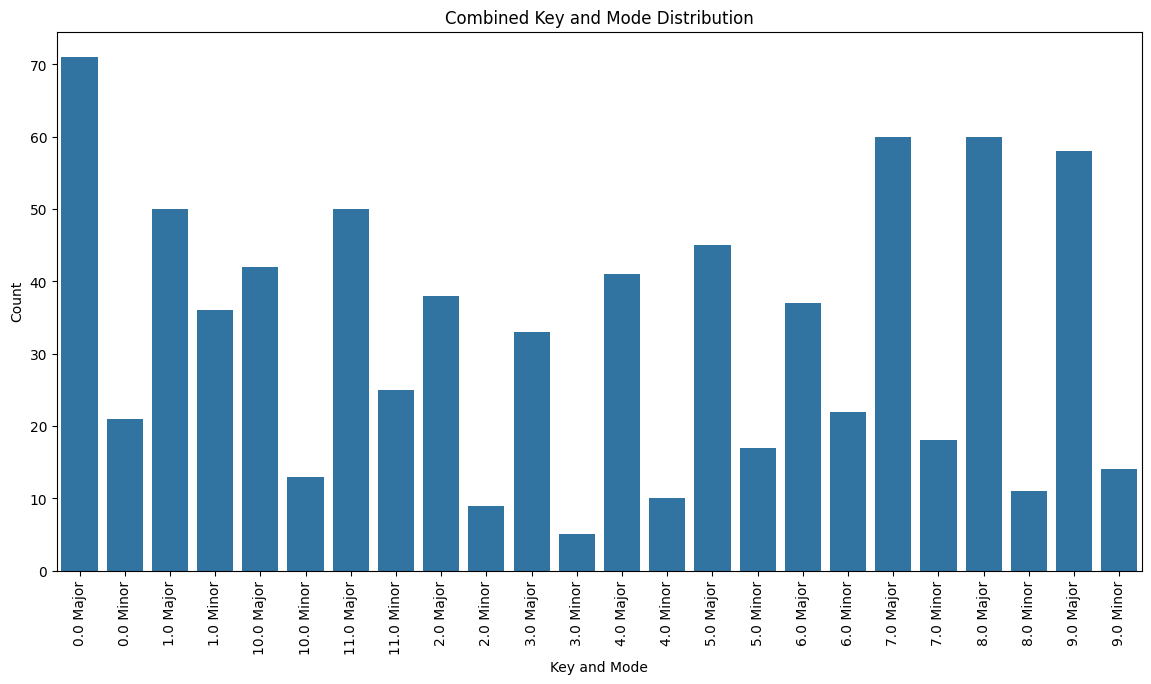

In [139]:
plt.figure(figsize=(14, 7))
sns.countplot(x='key_mode', data=df, order=sorted(df['key_mode'].unique()))
plt.title('Combined Key and Mode Distribution')
plt.xlabel('Key and Mode')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate the x labels to show them more clearly
plt.show()

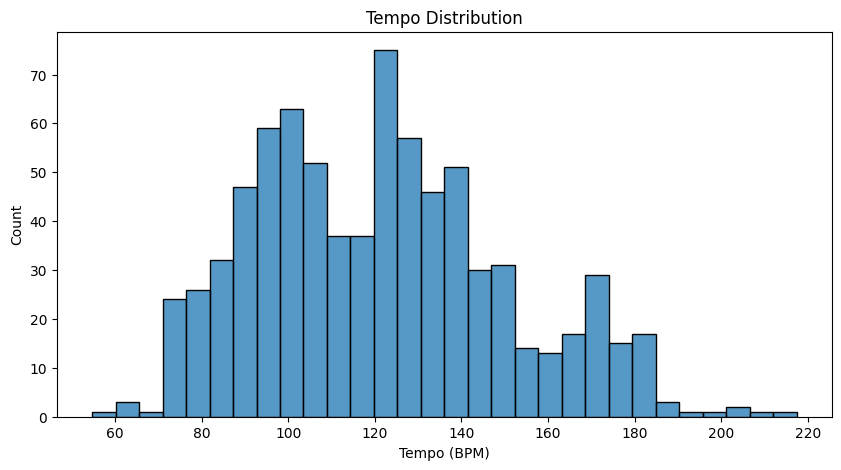

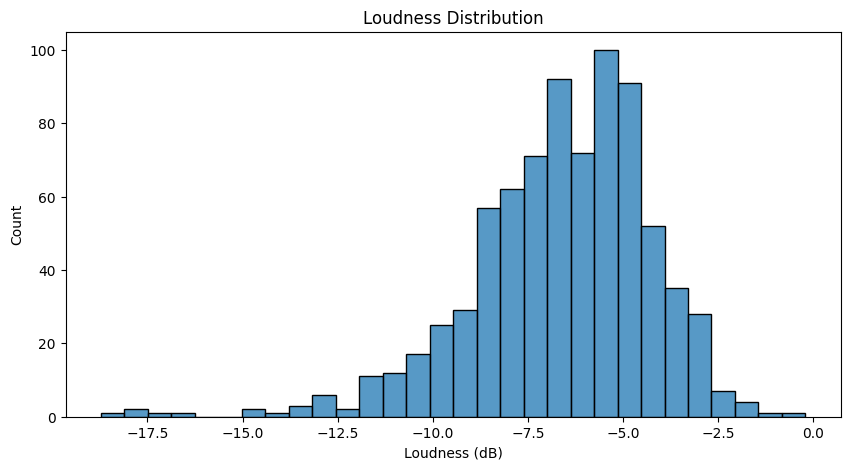

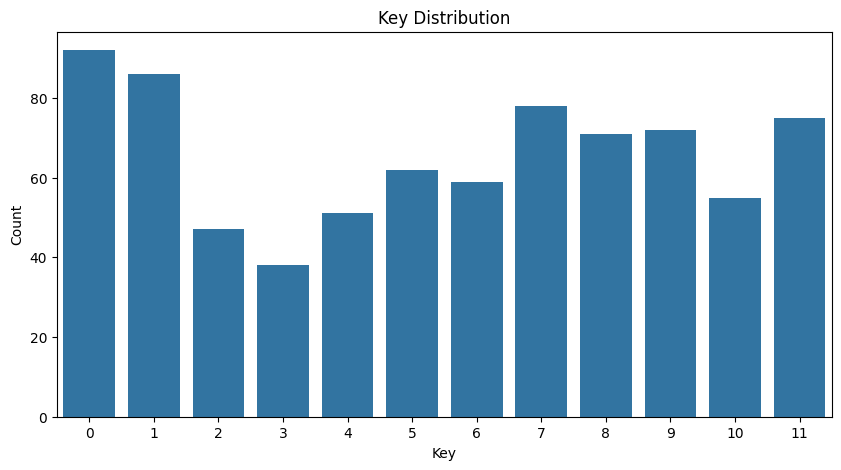

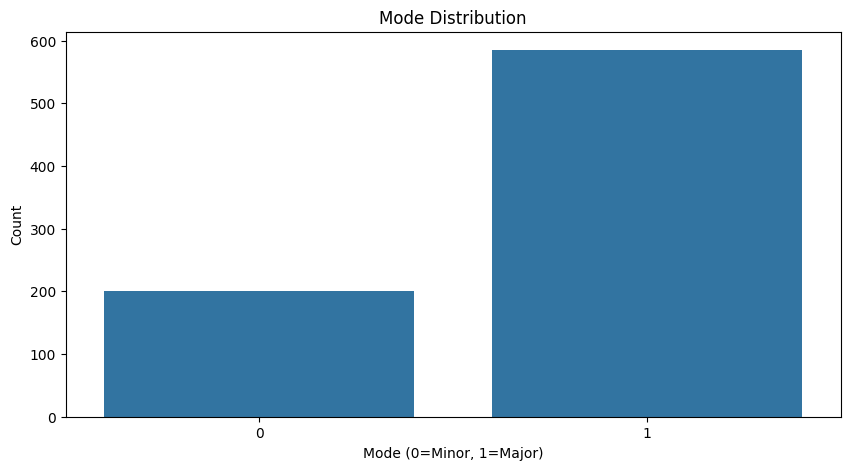

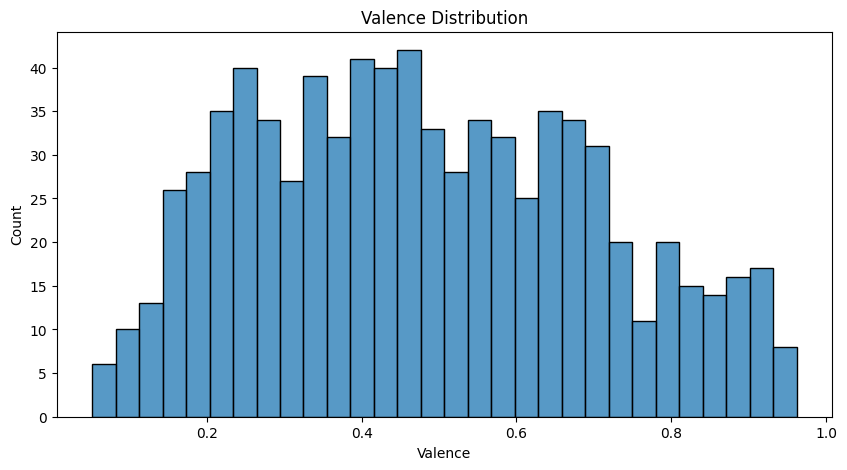

In [140]:
# Plot the distribution of Tempo
plt.figure(figsize=(10, 5))
sns.histplot(df['tempo'], bins=30, kde=False)
plt.title('Tempo Distribution')
plt.xlabel('Tempo (BPM)')
plt.ylabel('Count')
plt.show()

# Plot the distribution of Loudness
plt.figure(figsize=(10, 5))
sns.histplot(df['loudness'], bins=30, kde=False)
plt.title('Loudness Distribution')
plt.xlabel('Loudness (dB)')
plt.ylabel('Count')
plt.show()

# Plot the distribution of Key
plt.figure(figsize=(10, 5))
sns.countplot(x='key', data=df)
plt.title('Key Distribution')
plt.xlabel('Key')
plt.ylabel('Count')
plt.show()

# Plot the distribution of Mode
plt.figure(figsize=(10, 5))
sns.countplot(x='mode', data=df)
plt.title('Mode Distribution')
plt.xlabel('Mode (0=Minor, 1=Major)')
plt.ylabel('Count')
plt.show()

# Plot the distribution of Valence
plt.figure(figsize=(10, 5))
sns.histplot(df['valence'], bins=30, kde=False)
plt.title('Valence Distribution')
plt.xlabel('Valence')
plt.ylabel('Count')
plt.show()

valence_emotion
Neutral      453
Sad/Angry    194
Happy        139
Name: count, dtype: int64


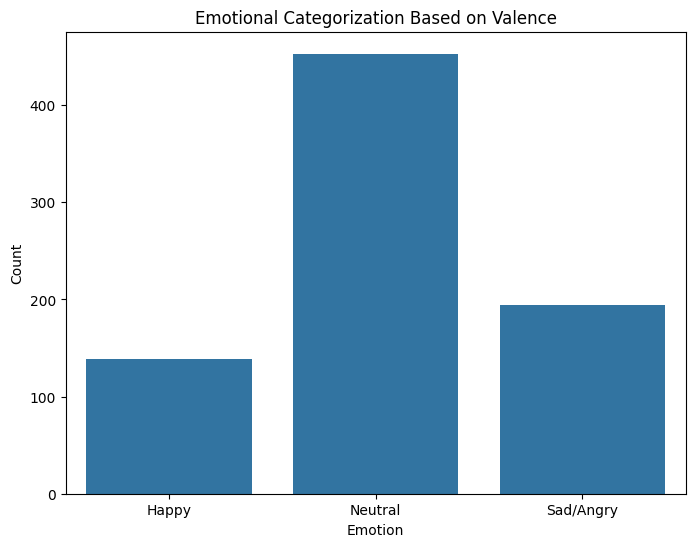

In [141]:
high_valence_threshold = 0.7  # Above this value, tracks are categorized as 'Happy'.
low_valence_threshold = 0.3   # Below this value, tracks are categorized as 'Sad' or 'Angry'.

# Categorize tracks based on valence
df['valence_emotion'] = df['valence'].apply(lambda v: 'Happy' if v > high_valence_threshold 
                                    else ('Sad/Angry' if v < low_valence_threshold 
                                          else 'Neutral'))

# Count the number of tracks in each category
emotion_counts = df['valence_emotion'].value_counts()

# Print the counts
print(emotion_counts)

# Plot the distribution of emotions
plt.figure(figsize=(8, 6))
sns.countplot(x='valence_emotion', data=df, order=['Happy', 'Neutral', 'Sad/Angry'])
plt.title('Emotional Categorization Based on Valence')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.show()

In [142]:
df

,tempo,key,mode,loudness,valence,key_mode,valence_emotion
1uru26I2JKd2mQZt0MDCUe,164.848,1,1,-4.328,0.321,1.0 Major,Neutral
5p7ujcrUXASCNwRaWNHR1C,136.041,6,1,-7.050,0.533,6.0 Major,Neutral
2iUXsYOEPhVqEBwsqP70rE,120.274,7,0,-5.114,0.152,7.0 Minor,Sad/Angry
5GGEJhZ5xjbU7UhSlipuoq,106.053,10,0,-4.935,0.237,10.0 Minor,Sad/Angry
0Wc6cbF38a90b8wov9V63F,98.219,3,0,-8.523,0.694,3.0 Minor,Neutral
...,...,...,...,...,...,...,...
5fdNHVZHbWB1AaXk4RBGVD,95.406,10,0,-14.576,0.597,10.0 Minor,Neutral
7fhiGdj0nn0ZCmIAocG8G0,144.783,4,1,-6.060,0.376,4.0 Major,Neutral
7v0EsDFDBpCgmIruSQTUNZ,96.076,11,1,-3.186,0.876,11.0 Major,Happy
2AYEOC02WLhUiOoaig2SEH,169.965,9,0,-3.553,0.527,9.0 Minor,Neutral


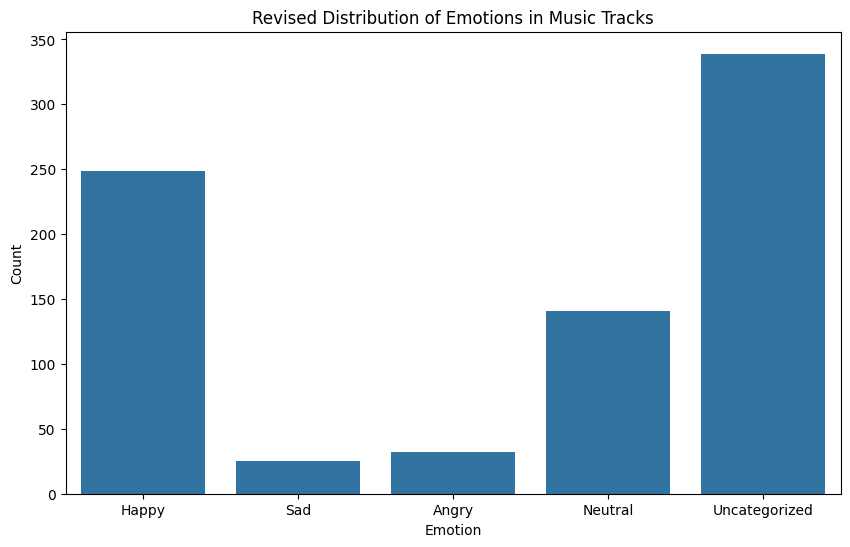

In [143]:
def revise_categorization(tempo, loudness, key, mode, valence):
    # Define the criteria for 'Happy'
    if valence > 0.5 and tempo > 100:
        return 'Happy'
    # Define the criteria for 'Sad'
    elif valence < 0.5 and tempo < 100 and mode == 0:
        return 'Sad'
    # Define the criteria for 'Angry'
    elif loudness > -5 and tempo > 120:
        return 'Angry'
    # Define the criteria for 'Neutral'
    elif 0.4 < valence < 0.6:
        return 'Neutral'
    else:
        return 'Uncategorized'

# Apply the revised categorization function to the DataFrame
df['feature_emotion'] = df.apply(lambda row: revise_categorization(row['tempo'], row['loudness'], row['key'], row['mode'], row['valence']), axis=1)

# Plot the new distribution of emotions
plt.figure(figsize=(10, 6))
sns.countplot(x='feature_emotion', data=df, order=['Happy', 'Sad', 'Angry', 'Neutral', 'Uncategorized'])
plt.title('Revised Distribution of Emotions in Music Tracks')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.show()


In [144]:
df

,tempo,key,mode,loudness,valence,key_mode,valence_emotion,feature_emotion
1uru26I2JKd2mQZt0MDCUe,164.848,1,1,-4.328,0.321,1.0 Major,Neutral,Angry
5p7ujcrUXASCNwRaWNHR1C,136.041,6,1,-7.050,0.533,6.0 Major,Neutral,Happy
2iUXsYOEPhVqEBwsqP70rE,120.274,7,0,-5.114,0.152,7.0 Minor,Sad/Angry,Uncategorized
5GGEJhZ5xjbU7UhSlipuoq,106.053,10,0,-4.935,0.237,10.0 Minor,Sad/Angry,Uncategorized
0Wc6cbF38a90b8wov9V63F,98.219,3,0,-8.523,0.694,3.0 Minor,Neutral,Uncategorized
...,...,...,...,...,...,...,...,...
5fdNHVZHbWB1AaXk4RBGVD,95.406,10,0,-14.576,0.597,10.0 Minor,Neutral,Neutral
7fhiGdj0nn0ZCmIAocG8G0,144.783,4,1,-6.060,0.376,4.0 Major,Neutral,Uncategorized
7v0EsDFDBpCgmIruSQTUNZ,96.076,11,1,-3.186,0.876,11.0 Major,Happy,Uncategorized
2AYEOC02WLhUiOoaig2SEH,169.965,9,0,-3.553,0.527,9.0 Minor,Neutral,Happy


In [145]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
features = df[['tempo', 'loudness', 'key', 'mode', 'valence']]
scaled_features = scaler.fit_transform(features)

In [146]:
scaled_features

array([[ 1.50433239,  0.96617399, -1.23073954,  0.58616529, -0.72994902],
       [ 0.51028063, -0.17786869,  0.1460912 ,  0.58616529,  0.23974248],
       [-0.03379595,  0.63582221,  0.42145735, -1.70600345, -1.5029578 ],
       ...,
       [-0.86880357,  1.44615075,  1.52292194,  0.58616529,  1.80863013],
       [ 1.68090624,  1.29190253,  0.97218964, -1.70600345,  0.21229838],
       [-0.11526768, -0.11230269,  0.97218964,  0.58616529,  1.53876316]])

In [148]:
kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)  # You may choose to optimize the number of clusters
df['cluster'] = kmeans.fit_predict(scaled_features)

In [149]:
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_features = pd.DataFrame(centroids, columns=['tempo', 'loudness', 'key', 'mode', 'valence'])
cluster_features

,tempo,loudness,key,mode,valence
0,116.834010,-5.632641,8.176768,1.000000e+00,0.605551
1,126.189098,-5.651026,1.663212,1.000000e+00,0.513314
2,118.695594,-9.246832,6.664975,9.847716e-01,0.289577
3,123.406561,-5.965293,5.282828,9.992007e-16,0.513765


In [150]:
# For example, if a centroid has a high valence and a high tempo, you might interpret that cluster as 'Happy'
for i, centroid in enumerate(cluster_features.values):
    tempo, loudness, key, mode, valence = centroid
    print(f"Cluster {i}:")
    if valence > 0.7 and tempo > 120:
        print("Might represent Happy tracks")
    elif valence < 0.4 and tempo < 100:
        print("Might represent Sad tracks")
    elif loudness > -5 and tempo > 120:
        print("Might represent Angry tracks")
    elif 0.4 <= valence <= 0.6:
        print("Might represent Neutral tracks")
    else:
        print("Might be more complex or require further analysis")
    print()


Cluster 0:
Might be more complex or require further analysis

Cluster 1:
Might represent Neutral tracks

Cluster 2:
Might be more complex or require further analysis

Cluster 3:
Might represent Neutral tracks



In [151]:
df[df['cluster']==2]

,tempo,key,mode,loudness,valence,key_mode,valence_emotion,feature_emotion,cluster
2Fxmhks0bxGSBdJ92vM42m,135.128,7,1,-10.965,0.562,7.0 Major,Neutral,Happy,2
6Qs4SXO9dwPj5GKvVOv8Ki,102.998,8,1,-7.513,0.347,8.0 Major,Neutral,Uncategorized,2
56wVfJKtnwlSZtC4NVgIrf,152.023,10,1,-11.843,0.343,10.0 Major,Neutral,Uncategorized,2
76WthWB0v0KXUHZoAclMVV,147.921,8,1,-8.416,0.416,8.0 Major,Neutral,Neutral,2
4GBzrfnEYWObQG2Ov4drl9,117.959,7,1,-7.510,0.305,7.0 Major,Neutral,Uncategorized,2
...,...,...,...,...,...,...,...,...,...
0T5iIrXA4p5GsubkhuBIKV,101.358,10,1,-6.050,0.227,10.0 Major,Sad/Angry,Uncategorized,2
2eOpn0ix5JGf47vUBUqZnV,138.713,11,1,-9.966,0.199,11.0 Major,Sad/Angry,Uncategorized,2
18ioFJkxW5B0hOXE0l2ddw,82.009,8,1,-7.106,0.146,8.0 Major,Sad/Angry,Uncategorized,2
2NKSdHfJ2j3PnSZUJfXa7J,118.545,4,1,-7.750,0.425,4.0 Major,Neutral,Neutral,2


In [152]:
cluster_to_emotion = {
    0: 'Angry',
    1: 'Sad',
    2: 'Neutral',
    3: 'Happy'
}

In [153]:
df['cluster_emotion'] = df['cluster'].map(cluster_to_emotion)

In [154]:
df

,tempo,key,mode,loudness,valence,key_mode,valence_emotion,feature_emotion,cluster,cluster_emotion
1uru26I2JKd2mQZt0MDCUe,164.848,1,1,-4.328,0.321,1.0 Major,Neutral,Angry,1,Sad
5p7ujcrUXASCNwRaWNHR1C,136.041,6,1,-7.050,0.533,6.0 Major,Neutral,Happy,0,Angry
2iUXsYOEPhVqEBwsqP70rE,120.274,7,0,-5.114,0.152,7.0 Minor,Sad/Angry,Uncategorized,3,Happy
5GGEJhZ5xjbU7UhSlipuoq,106.053,10,0,-4.935,0.237,10.0 Minor,Sad/Angry,Uncategorized,3,Happy
0Wc6cbF38a90b8wov9V63F,98.219,3,0,-8.523,0.694,3.0 Minor,Neutral,Uncategorized,3,Happy
...,...,...,...,...,...,...,...,...,...,...
5fdNHVZHbWB1AaXk4RBGVD,95.406,10,0,-14.576,0.597,10.0 Minor,Neutral,Neutral,2,Neutral
7fhiGdj0nn0ZCmIAocG8G0,144.783,4,1,-6.060,0.376,4.0 Major,Neutral,Uncategorized,1,Sad
7v0EsDFDBpCgmIruSQTUNZ,96.076,11,1,-3.186,0.876,11.0 Major,Happy,Uncategorized,0,Angry
2AYEOC02WLhUiOoaig2SEH,169.965,9,0,-3.553,0.527,9.0 Minor,Neutral,Happy,3,Happy


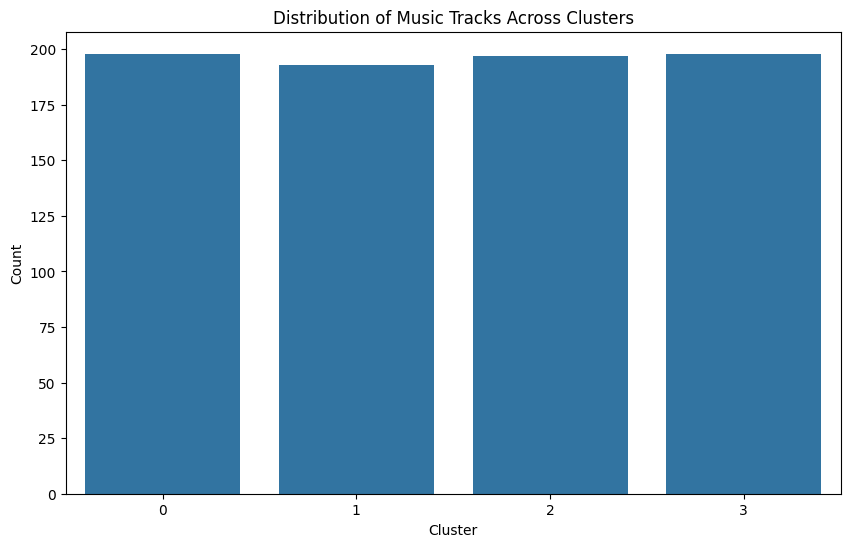

In [155]:
plt.figure(figsize=(10, 6))
sns.countplot(x='cluster', data=df)
plt.title('Distribution of Music Tracks Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

In [156]:
def combine_emotions(row):
    # Define the scoring for each method
    valence_score = 3
    feature_score = 1
    cluster_score = 2

    # Special handling for 'Sad/Angry' with 'Uncategorized' feature emotion
    if row['valence_emotion'] == 'Sad/Angry' and row['feature_emotion'] == 'Uncategorized':
        if row['cluster_emotion'] in ['Sad', 'Angry']:
            return row['cluster_emotion']
        elif row['cluster_emotion'] == 'Neutral':
            return 'Neutral'  # Or any other default logic you prefer
        else:
            return 'Uncategorized'  # If cluster emotion is also not helpful

    # Regular handling for 'Sad/Angry' when feature emotion is not 'Uncategorized'
    elif row['valence_emotion'] == 'Sad/Angry':
        scores = {'Sad': 0, 'Angry': 0}
        if row['feature_emotion'] in ['Sad', 'Angry']:
            scores[row['feature_emotion']] += feature_score
        if row['cluster_emotion'] in ['Sad', 'Angry']:
            scores[row['cluster_emotion']] += cluster_score
        return max(scores, key=scores.get) if max(scores.values()) > 0 else 'Sad/Angry'

    # Regular voting for other cases
    votes = {'Happy': 0, 'Sad': 0, 'Angry': 0, 'Neutral': 0}
    votes[row['valence_emotion']] += valence_score
    if row['feature_emotion'] != 'Uncategorized':
        votes[row['feature_emotion']] += feature_score
    votes[row['cluster_emotion']] += cluster_score
    return max(votes, key=votes.get)

# Apply the function to each row in the DataFrame
df['combined_emotion'] = df.apply(combine_emotions, axis=1)


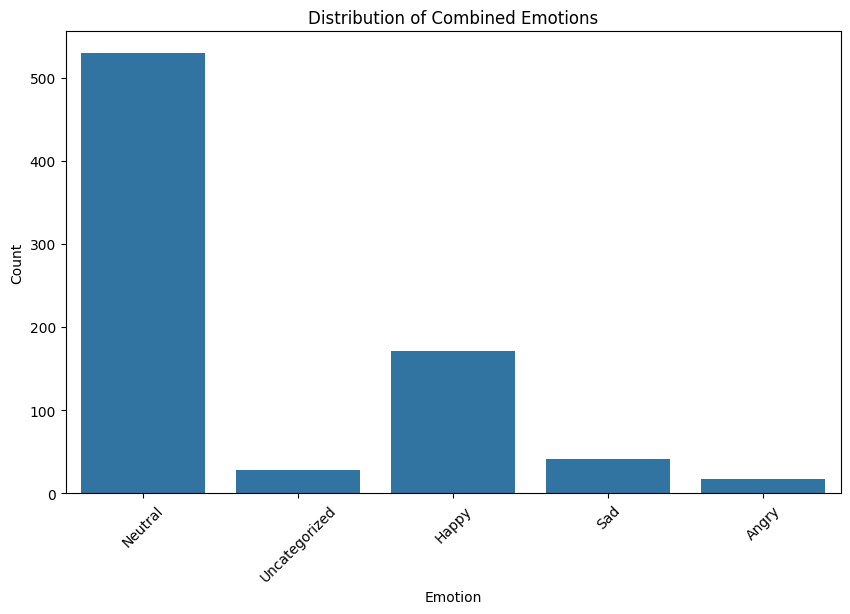

In [157]:
plt.figure(figsize=(10, 6))
sns.countplot(x='combined_emotion', data=df)
plt.title('Distribution of Combined Emotions')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()

In [158]:
df

,tempo,key,mode,loudness,valence,key_mode,valence_emotion,feature_emotion,cluster,cluster_emotion,combined_emotion
1uru26I2JKd2mQZt0MDCUe,164.848,1,1,-4.328,0.321,1.0 Major,Neutral,Angry,1,Sad,Neutral
5p7ujcrUXASCNwRaWNHR1C,136.041,6,1,-7.050,0.533,6.0 Major,Neutral,Happy,0,Angry,Neutral
2iUXsYOEPhVqEBwsqP70rE,120.274,7,0,-5.114,0.152,7.0 Minor,Sad/Angry,Uncategorized,3,Happy,Uncategorized
5GGEJhZ5xjbU7UhSlipuoq,106.053,10,0,-4.935,0.237,10.0 Minor,Sad/Angry,Uncategorized,3,Happy,Uncategorized
0Wc6cbF38a90b8wov9V63F,98.219,3,0,-8.523,0.694,3.0 Minor,Neutral,Uncategorized,3,Happy,Neutral
...,...,...,...,...,...,...,...,...,...,...,...
5fdNHVZHbWB1AaXk4RBGVD,95.406,10,0,-14.576,0.597,10.0 Minor,Neutral,Neutral,2,Neutral,Neutral
7fhiGdj0nn0ZCmIAocG8G0,144.783,4,1,-6.060,0.376,4.0 Major,Neutral,Uncategorized,1,Sad,Neutral
7v0EsDFDBpCgmIruSQTUNZ,96.076,11,1,-3.186,0.876,11.0 Major,Happy,Uncategorized,0,Angry,Happy
2AYEOC02WLhUiOoaig2SEH,169.965,9,0,-3.553,0.527,9.0 Minor,Neutral,Happy,3,Happy,Happy


In [159]:
filtered_df = df[df['combined_emotion'] == 'Uncategorized']
filtered_df

,tempo,key,mode,loudness,valence,key_mode,valence_emotion,feature_emotion,cluster,cluster_emotion,combined_emotion
2iUXsYOEPhVqEBwsqP70rE,120.274,7,0,-5.114,0.1520,7.0 Minor,Sad/Angry,Uncategorized,3,Happy,Uncategorized
5GGEJhZ5xjbU7UhSlipuoq,106.053,10,0,-4.935,0.2370,10.0 Minor,Sad/Angry,Uncategorized,3,Happy,Uncategorized
54l9GJGQ1UCFKe2tzt1Vxt,108.050,4,0,-4.793,0.2190,4.0 Minor,Sad/Angry,Uncategorized,3,Happy,Uncategorized
4jp4Z02kzzg8gK0NmDGgml,101.944,6,0,-5.498,0.1680,6.0 Minor,Sad/Angry,Uncategorized,3,Happy,Uncategorized
1bkvGbgK4HU8B7Ue4k7O7I,175.867,1,0,-6.825,0.2380,1.0 Minor,Sad/Angry,Uncategorized,3,Happy,Uncategorized
4TnjEaWOeW0eKTKIEvJyCa,127.085,10,0,-8.756,0.2360,10.0 Minor,Sad/Angry,Uncategorized,3,Happy,Uncategorized
1T575AhHueYinKSDflEsGK,199.843,7,0,-9.104,0.2450,7.0 Minor,Sad/Angry,Uncategorized,3,Happy,Uncategorized
5SlU0Yhi51jobhEiGE4xDv,174.032,6,0,-6.688,0.1460,6.0 Minor,Sad/Angry,Uncategorized,3,Happy,Uncategorized
2qG81jL9UIP54uS8gYyP4k,141.642,11,0,-7.983,0.0969,11.0 Minor,Sad/Angry,Uncategorized,3,Happy,Uncategorized
1bQHKplf5fkkecalhAgYp0,138.772,2,0,-7.953,0.2130,2.0 Minor,Sad/Angry,Uncategorized,3,Happy,Uncategorized


In [160]:
df = df[df['combined_emotion'] != 'Uncategorized']
df

,tempo,key,mode,loudness,valence,key_mode,valence_emotion,feature_emotion,cluster,cluster_emotion,combined_emotion
1uru26I2JKd2mQZt0MDCUe,164.848,1,1,-4.328,0.321,1.0 Major,Neutral,Angry,1,Sad,Neutral
5p7ujcrUXASCNwRaWNHR1C,136.041,6,1,-7.050,0.533,6.0 Major,Neutral,Happy,0,Angry,Neutral
0Wc6cbF38a90b8wov9V63F,98.219,3,0,-8.523,0.694,3.0 Minor,Neutral,Uncategorized,3,Happy,Neutral
6TqXcAFInzjp0bODyvrWEq,135.984,0,1,-8.575,0.346,0.0 Major,Neutral,Uncategorized,1,Sad,Neutral
25sgk305KZfyuqVBQIahim,133.002,1,1,-4.724,0.628,1.0 Major,Neutral,Happy,1,Sad,Neutral
...,...,...,...,...,...,...,...,...,...,...,...
5fdNHVZHbWB1AaXk4RBGVD,95.406,10,0,-14.576,0.597,10.0 Minor,Neutral,Neutral,2,Neutral,Neutral
7fhiGdj0nn0ZCmIAocG8G0,144.783,4,1,-6.060,0.376,4.0 Major,Neutral,Uncategorized,1,Sad,Neutral
7v0EsDFDBpCgmIruSQTUNZ,96.076,11,1,-3.186,0.876,11.0 Major,Happy,Uncategorized,0,Angry,Happy
2AYEOC02WLhUiOoaig2SEH,169.965,9,0,-3.553,0.527,9.0 Minor,Neutral,Happy,3,Happy,Happy


In [161]:
df.combined_emotion.value_counts()

combined_emotion
Neutral    529
Happy      171
Sad         41
Angry       17
Name: count, dtype: int64

In [187]:
def insert_audio(trackid, tempo, key, mode, loudness, valence, valenceemotion, featureemotion, clusteremotion, combinedemotion):
    conn = None
    try:
        # Connect to your PostgreSQL database
        conn = psycopg2.connect(
            dbname="sentirhy",
            user="owner",
            password="oaPBeAzranUQ",
            host="104.168.28.119"
        )
        cursor = conn.cursor()

        # Insert artist data
        cursor.execute("""
            INSERT INTO sentirhy.audiofeats (trackid, tempo, key, mode, loudness, valence, valenceemotion, featureemotion, clusteremotion, combinedemotion)
            VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
            ON CONFLICT (trackid) DO NOTHING; 
        """, (trackid, tempo, key, mode, loudness, valence, valenceemotion, featureemotion, clusteremotion, combinedemotion))

        conn.commit()
        cursor.close()

    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
    finally:
        if conn is not None:
            conn.close()

In [188]:
for index, row in df.iterrows():
    insert_audio(index, row['tempo'], row['key'], row['mode'], row['loudness'], row['valence'], row['valence_emotion'], row['feature_emotion'], row['cluster_emotion'], row['combined_emotion'])

insert or update on table "audiofeats" violates foreign key constraint "audiofeats_trackid_fkey"
DETAIL:  Key (trackid)=(1JLtvvPsHwLyd2ufASdkWV) is not present in table "tracks".

insert or update on table "audiofeats" violates foreign key constraint "audiofeats_trackid_fkey"
DETAIL:  Key (trackid)=(3cHyrEgdyYRjgJKSOiOtcS) is not present in table "tracks".

insert or update on table "audiofeats" violates foreign key constraint "audiofeats_trackid_fkey"
DETAIL:  Key (trackid)=(7LGg45oJbIiyt0zVwb5Ho0) is not present in table "tracks".

insert or update on table "audiofeats" violates foreign key constraint "audiofeats_trackid_fkey"
DETAIL:  Key (trackid)=(2E532ozrMbRXwuZkpoegUP) is not present in table "tracks".

insert or update on table "audiofeats" violates foreign key constraint "audiofeats_trackid_fkey"
DETAIL:  Key (trackid)=(1tnnaRvk67SSne2KuwhIys) is not present in table "tracks".

insert or update on table "audiofeats" violates foreign key constraint "audiofeats_trackid_fkey"
DET

In [164]:
import psycopg2

def insert_artist(artist_id, name):
    conn = None
    try:
        # Connect to your PostgreSQL database
        conn = psycopg2.connect(
            dbname="sentirhy",
            user="owner",
            password="oaPBeAzranUQ",
            host="104.168.28.119"
        )
        cursor = conn.cursor()

        # Insert artist data
        cursor.execute("""
            INSERT INTO sentirhy.artists (artistID, name)
            VALUES (%s, %s)
            ON CONFLICT (artistID) DO NOTHING; 
        """, (artist_id, name))

        conn.commit()
        cursor.close()

    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
    finally:
        if conn is not None:
            conn.close()

In [165]:
for artist in all_artists:
    insert_artist(artist['artistID'], artist['name'])

In [168]:
def insert_album(albumid, title, artistid, releasedate, coverarturl):
    conn = None
    try:
        # Connect to your PostgreSQL database
        conn = psycopg2.connect(
            dbname="sentirhy",
            user="owner",
            password="oaPBeAzranUQ",
            host="104.168.28.119"
        )
        cursor = conn.cursor()

        # Insert artist data
        cursor.execute("""
            INSERT INTO sentirhy.albums (albumid, title, artistid, releasedate, coverarturl)
            VALUES (%s, %s, %s, %s, %s)
            ON CONFLICT (albumid) DO NOTHING; 
        """, (albumid, title, artistid, releasedate, coverarturl))

        conn.commit()
        cursor.close()

    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
    finally:
        if conn is not None:
            conn.close()

In [169]:
for album in albums_data:
    insert_album(album['albumID'],album['title'], album['artistID'], album['releaseDate'], album['coverArtURL'])

invalid input syntax for type date: "2017"
LINE 3: ...aHRUL', '感谢你曾来过', '0Nu7uGMynoaIdKnfLRgxJ8', '2017', 'h...
                                                             ^

invalid input syntax for type date: "2012"
LINE 3: ...down (Deluxe Version)', '0TnOYISbd1XYRBk9myaseg', '2012', 'h...
                                                             ^

invalid input syntax for type date: "2013"
LINE 3: ...ahYnthwaKHw', 'Melody', '1sNBvC3ul9Xy0beVtEDPqV', '2013', 'h...
                                                             ^

insert or update on table "albums" violates foreign key constraint "albums_artistid_fkey"
DETAIL:  Key (artistid)=(3f0GZTXzBCmd5IBiMfsh1H) is not present in table "artists".

insert or update on table "albums" violates foreign key constraint "albums_artistid_fkey"
DETAIL:  Key (artistid)=(3NVrWkcHOtmPbMSvgHmijZ) is not present in table "artists".

invalid input syntax for type date: "1979"
LINE 3: ...ddYigh', 'Voulez-Vous', '0LcJLqbBmaGUft1e9Mm8HV', '1979'

In [181]:
def insert_track(trackid, title, artistid, albumid, duration,  releasedate, spotifyurl):
    conn = None
    try:
        # Connect to your PostgreSQL database
        conn = psycopg2.connect(
            dbname="sentirhy",
            user="owner",
            password="oaPBeAzranUQ",
            host="104.168.28.119"
        )
        cursor = conn.cursor()

        # Insert artist data
        cursor.execute("""
            INSERT INTO sentirhy.tracks (trackid, title, artistid, albumid, duration, releasedate, spotifyurl)
            VALUES (%s, %s, %s, %s, %s, %s, %s)
            ON CONFLICT (trackid) DO NOTHING; 
        """, (trackid, title, artistid, albumid, duration, releasedate, spotifyurl))

        conn.commit()
        cursor.close()

    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
    finally:
        if conn is not None:
            conn.close()

In [182]:
for track_id, track_info in tracks_data.items():
    insert_track(track_info['trackID'], track_info['title'], track_info['artistID'], track_info['albumID'], track_info['duration'], track_info['releaseDate'], track_info['spotifyURL'])

invalid input syntax for type date: "2017"
LINE 3: ...oaIdKnfLRgxJ8', '0nnT57KfesBkYeVbMaHRUL', 250005, '2017', 'h...
                                                             ^

invalid input syntax for type date: "2012"
LINE 3: ...1XYRBk9myaseg', '2F7tejLHzTqFq2XLol9ZGy', 204160, '2012', 'h...
                                                             ^

invalid input syntax for type date: "2013"
LINE 3: ...9Xy0beVtEDPqV', '5DfouQvBikRahYnthwaKHw', 237473, '2013', 'h...
                                                             ^

insert or update on table "tracks" violates foreign key constraint "tracks_albumid_fkey"
DETAIL:  Key (albumid)=(5WJ4BZKGCxnGEpjGF27Zdd) is not present in table "albums".

insert or update on table "tracks" violates foreign key constraint "tracks_albumid_fkey"
DETAIL:  Key (albumid)=(6Kc0f1PCbWZLOmZNOyXYGN) is not present in table "albums".

invalid input syntax for type date: "1979"
LINE 3: ...aGUft1e9Mm8HV', '7iLuHJkrb9KHPkMgddYigh', 292613, '1979'

In [199]:
for country, tracks_info in top_tracks_by_country_filtered.items():
    for track_info in tracks_info:
        track_id = track_info['track']['id']
        popularity = track_info['track']['popularity']

        print(track_id, popularity, country )

1uru26I2JKd2mQZt0MDCUe 61 Random
5p7ujcrUXASCNwRaWNHR1C 77 Random
2iUXsYOEPhVqEBwsqP70rE 85 Random
5GGEJhZ5xjbU7UhSlipuoq 49 Random
0Wc6cbF38a90b8wov9V63F 67 Random
6TqXcAFInzjp0bODyvrWEq 72 Random
25sgk305KZfyuqVBQIahim 2 Random
6u7jPi22kF8CTQ3rb9DHE7 1 Random
7qEHsqek33rTcFNT9PFqLf 92 Random
0uUNN1nSoUx1A4fkDCWDQ7 1 Random
0lks2Kt9veMOFEAPN0fsqN 75 Random
4v7DgEMw6EvYyuQ4eWFD9l 67 Random
7njKgVl3AnLflRad38o7AG 0 Random
4tNXntkAzQ5A2dfYRYGIIQ 0 Random
0g2XnkKghVN22yze1gTJzl 60 Random
22vgEDb5hykfaTwLuskFGD 83 Random
0BVRfqRHpYnXnv9t5yp9ai 51 Random
3HVWdVOQ0ZA45FuZGSfvns 79 Random
6LsAAHotRLMOHfCsSfYCsz 70 Random
4MsUsFfWseB9M2plGJyuIw 12 Random
5icOoE6VgqFKohjWWNp0Ac 77 Random
2Fxmhks0bxGSBdJ92vM42m 85 Random
6ocbgoVGwYJhOv1GgI9NsF 87 Random
0i0wnv9UoFdZ5MfuFGQzMy 63 Random
54l9GJGQ1UCFKe2tzt1Vxt 59 Random
29fRTIKsJhLUJoldM89GZS 15 Random
6Qs4SXO9dwPj5GKvVOv8Ki 76 Random
76ziL4M1nP9psv11be5812 0 Random
3V23oYrFVc5VW1Ftq2wPCu 0 Random
4gjVhOuUPOpF23uKkcfVYU 0 Random
60zxdAqWtdDu0vYsbX